In [2]:
!pip install -q sklearn
!pip install tensorflow==2.15

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found exist

In [5]:
csv_columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
species = ["setosa", "versicolor", "virginica"]

In [6]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=csv_columns, header=0)
test = pd.read_csv(test_path, names=csv_columns, header=0)

print(train.head())
print(test.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           6.4          2.8           5.6          2.2        2
1           5.0          2.3           3.3          1.0        1
2           4.9          2.5           4.5          1.7        2
3           4.9          3.1           1.5          0.1        0
4           5.7          3.8           1.7          0.3        0
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.9          3.0           4.2          1.5        1
1           6.9          3.1           5.4          2.1        2
2           5.1          3.3           1.7          0.5        0
3           6.0          3.4           4.5          1.6        1
4           5.5          2.5           4.0          1.3        1


<Axes: >

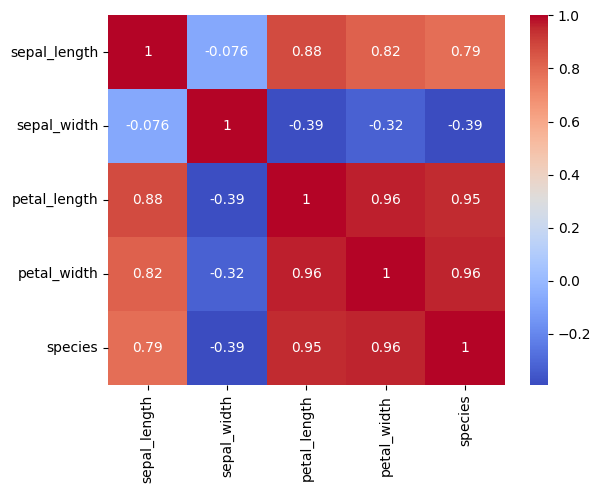

In [7]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True, cmap='coolwarm')

species         1.000000
petal_width     0.959223
petal_length    0.950742
sepal_length    0.786500
sepal_width    -0.393378
Name: species, dtype: float64


<Axes: >

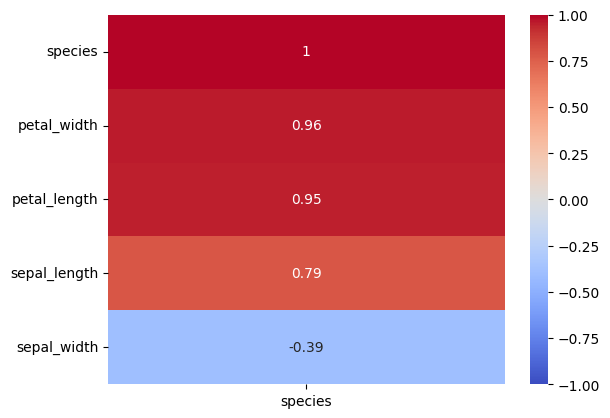

In [8]:
corr_with_species = corr_matrix['species'].sort_values(ascending=False)
print(corr_with_species)

corr_with_species_df = pd.DataFrame(corr_with_species)
sns.heatmap(corr_with_species_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

In [9]:
train_y = train.pop('species')
test_y = test.pop('species')

print(train.head())
print(train_y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           6.4          2.8           5.6          2.2
1           5.0          2.3           3.3          1.0
2           4.9          2.5           4.5          1.7
3           4.9          3.1           1.5          0.1
4           5.7          3.8           1.7          0.3
0    2
1    1
2    2
3    0
4    0
Name: species, dtype: int64


In [11]:
train.shape

(120, 4)

In [12]:
def input_fn(features, labels, training=True, batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    if training:
        dataset = dataset.shuffle(1000).repeat()
    return dataset.batch(batch_size)

In [13]:
feather_format_columns = []
for key in train.keys():
    feather_format_columns.append(tf.feature_column.numeric_column(key=key))

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [17]:
from tensorflow import keras

# Define the model
model = keras.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=(len(feather_format_columns),)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train, train_y, epochs=256)



Epoch 1/256
4/4 [==============================] - 1s 6ms/step - loss: 1.1770 - accuracy: 0.3000
Epoch 2/256
4/4 [==============================] - 0s 4ms/step - loss: 1.1161 - accuracy: 0.3000
Epoch 3/256
4/4 [==============================] - 0s 5ms/step - loss: 1.0837 - accuracy: 0.3000
Epoch 4/256
4/4 [==============================] - 0s 4ms/step - loss: 1.0432 - accuracy: 0.3000
Epoch 5/256
4/4 [==============================] - 0s 4ms/step - loss: 1.0066 - accuracy: 0.3000
Epoch 6/256
4/4 [==============================] - 0s 4ms/step - loss: 0.9725 - accuracy: 0.6167
Epoch 7/256
4/4 [==============================] - 0s 4ms/step - loss: 0.9398 - accuracy: 0.6500
Epoch 8/256
4/4 [==============================] - 0s 4ms/step - loss: 0.9124 - accuracy: 0.6500
Epoch 9/256
4/4 [==============================] - 0s 4ms/step - loss: 0.8912 - accuracy: 0.6500
Epoch 10/256
4/4 [==============================] - 0s 4ms/step - loss: 0.8796 - accuracy: 0.6500
Epoch 11/256
4/4 [===========

In [18]:
# Evaluating the model
eval_loss, eval_accuracy = model.evaluate(test, test_y)
print(f"Evaluation Loss: {eval_loss:.4f}")
print(f"Evaluation Accuracy: {eval_accuracy:.4f}")


1/1 [==============================] - 0s 179ms/step - loss: 0.0768 - accuracy: 0.9333
Evaluation Loss: 0.0768
Evaluation Accuracy: 0.9333


In [21]:
# Making predictions using the model
# Function to get user input for features
def get_user_input(feature_columns):
    user_input = []
    for feature in feature_columns:
        while True: # loop to continuously prompt the user until a valid input is entered
            value = input(f"Enter value for {feature}: ")
            if value.lower() == 'q': # Check if the user wants to quit
                return np.array([['q']]) # Return a special value to signal quit
            try:
                value = float(value) # Try to convert the input to a float
                user_input.append(value)
                break # Break the loop if conversion is successful
            except ValueError:
                print("Invalid input. Please enter a number or 'q' to quit.")
    return np.array([user_input])

# Function to make prediction
def predict_class(model, input_data):
    prediction = model.predict(input_data)
    class_prediction = np.argmax(prediction, axis=1)[0]
    class_probabilities = prediction[0]
    return class_prediction, class_probabilities



# Main prediction loop
while True:
    print("\nEnter feature values for prediction (or 'q' to quit):")
    user_input = get_user_input(feather_format_columns)

    if user_input[0][0] == 'q': # Check for the special quit value
        break

    class_prediction, class_probabilities = predict_class(model, user_input)

    print(f"\nPredicted class: {species[class_prediction]}")
    print("Class probabilities:")
    for i, prob in enumerate(class_probabilities):
        print(f"{species[i]}: {prob:.4f}")

    continue_prediction = input("\nDo you want to make another prediction? (y/n): ")
    if continue_prediction.lower() != 'y':
        break

print("Thank you for using the prediction model!")


Enter feature values for prediction (or 'q' to quit):
Enter value for NumericColumn(key='sepal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None): 2.4
Enter value for NumericColumn(key='sepal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None): 2.6
Enter value for NumericColumn(key='petal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None): 3
Enter value for NumericColumn(key='petal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None): 4.3
1/1 [==============================] - 0s 100ms/step

Predicted class: virginica
Class probabilities:
setosa: 0.0001
versicolor: 0.0380
virginica: 0.9619

Do you want to make another prediction? (y/n): y

Enter feature values for prediction (or 'q' to quit):
Enter value for NumericColumn(key='sepal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None): q
Thank you for using the prediction model!
